In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/games_of_all_time.csv')
model_data = data[['user_score', 'meta_score', 'genre', 'rating']]
model_data = model_data.dropna()

model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7691 entries, 0 to 8830
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_score  7691 non-null   float64
 1   meta_score  7691 non-null   float64
 2   genre       7691 non-null   object 
 3   rating      7691 non-null   object 
dtypes: float64(2), object(2)
memory usage: 300.4+ KB


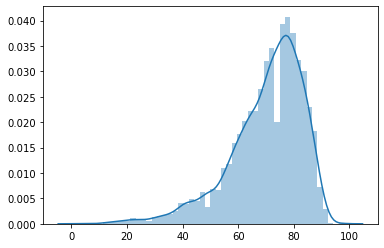

In [17]:
import seaborn as sns

sns.distplot(model_data[['user_score']])

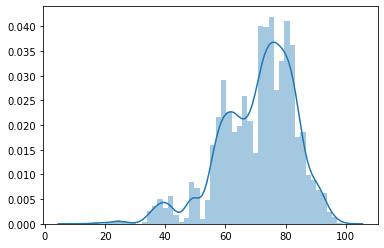

In [18]:
import seaborn as sns

sns.distplot(model_data[['meta_score']])

In [2]:
import pprint
i = 0
var_dict = {}

for array in model_data[['genre']].iloc:
    #print(i)
    try: 
        g_arr = array[0][1:len(array[0])-1].split(',')
        for genre in g_arr:
            genre = genre.strip()
            genre = genre[1:len(genre)-1]
            if genre in var_dict:
                var_dict[genre] += 1
            else:
                var_dict[genre] = 1
    except:
        pass
    i += 1

pp = pprint.PrettyPrinter(indent=4)
delete = []

for genre in var_dict:
    if var_dict[genre] <= 10:
        delete.append(genre)

for genre in delete:
    del var_dict[genre]

genres = var_dict.keys()

print(len(var_dict.keys()))
pp.pprint(var_dict)
print(genres)
    

135
{   '2D': 627,
    '3D': 622,
    '4X': 24,
    'Action': 2818,
    'Action Adventure': 1044,
    'Action RPG': 382,
    'Adventure': 545,
    'Alternative': 89,
    'Arcade': 818,
    'Artillery': 13,
    'Athletics': 20,
    'Automobile': 281,
    'Baseball': 63,
    'Basketball': 78,
    "Beat-'Em-Up": 218,
    'Biking': 14,
    'Billiards': 11,
    'Board / Card Game': 36,
    'Board Games': 26,
    'Boxing': 21,
    'Boxing / Martial Arts': 15,
    'Breeding/Constructing': 28,
    'Business / Tycoon': 63,
    'Car Combat': 23,
    'Card Battle': 31,
    'Career': 29,
    'City Building': 17,
    'Civilian': 29,
    'Combat': 159,
    'Command': 39,
    'Compilation': 195,
    'Console-style RPG': 165,
    'Dancing': 41,
    'Defense': 24,
    'Driving': 445,
    'Edutainment': 17,
    'Exercise / Fitness': 11,
    'Fantasy': 481,
    'Fighting': 277,
    'First-Person': 651,
    'Fishing': 12,
    'Flight': 85,
    'Football': 77,
    'Formula One': 21,
    'Futuristic': 47,
 

In [3]:
var_dict2 = {}
for rating in model_data[['rating']].iloc:
    if rating[0] in var_dict2:
        var_dict2[rating[0]] +=1
    else:
        var_dict2[rating[0]] =1
ratings = var_dict2.keys()

print(len(var_dict2.keys()))
pp.pprint(var_dict2)
print(ratings)

7
{'AO': 1, 'E': 2371, 'E10+': 1128, 'K-A': 6, 'M': 1535, 'RP': 14, 'T': 2636}
dict_keys(['E', 'T', 'E10+', 'M', 'K-A', 'RP', 'AO'])


In [4]:
def make_genre_arr(index):
    g_arr = model_data[['genre']].iloc[index][0][1:len(model_data[['genre']].iloc[index][0])-1].split(',')
    for i in range(len(g_arr)):
        g_arr[i] = g_arr[i].strip()
        g_arr[i] = g_arr[i][1:len(g_arr[i])-1]
    return g_arr
genre_dict = {}
for genre in genres:
    genre_dict[genre] = [0]*model_data.shape[0]
for i in range(model_data.shape[0]):
    gs = make_genre_arr(i)
    for genre in gs:
        if genre in genre_dict:
            genre_dict[genre][i] = 1
print('Success!')
        

Success!


In [5]:
rating_dict = {}
for rating in ratings:
    rating_dict[rating] = [0]*model_data.shape[0]
for i in range(model_data.shape[0]):
    r = model_data[['rating']].iloc[i][0]
    rating_dict[r] = 1
print('Success!')

Success!


In [6]:
from sklearn.model_selection import train_test_split

for genre in genre_dict:
    model_data[genre] = genre_dict[genre]

for rating in rating_dict:
    model_data[rating] = rating_dict[rating]

y_user = model_data[['user_score']]
y_critic = model_data[['meta_score']]
x = model_data.drop(columns = ['user_score', 'meta_score', 'genre', 'rating'])

print(x.info())

ux_train, ux_test, uy_train, uy_test = train_test_split(x, y_user, test_size=0.2, random_state=42)
cx_train, cx_test, cy_train, cy_test = train_test_split(x, y_critic, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7691 entries, 0 to 8830
Columns: 142 entries, Action Adventure to AO
dtypes: int64(142)
memory usage: 8.4 MB
None


In [7]:
from sklearn.ensemble import RandomForestRegressor

regr1 = RandomForestRegressor(n_estimators=1000, random_state=0)
regr2 = RandomForestRegressor(n_estimators=1000, random_state=0)

regr1.fit(ux_train, np.ravel(uy_train))
regr2.fit(cx_train, np.ravel(cy_train))

RandomForestRegressor(n_estimators=1000, random_state=0)

In [8]:
regr1.score(ux_test, np.ravel(uy_test))

0.030780999281232013

In [9]:
regr2.score(cx_test, np.ravel(cy_test))

0.014655980065328644

[67.42036601 65.96969641 66.68710129 ... 68.84535712 72.24248733
 68.67887868]


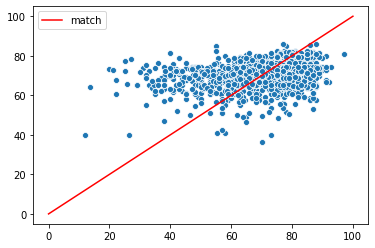

In [10]:
import seaborn as sns
pred = regr1.predict(ux_test)
print(pred)
sns.scatterplot(x=np.ravel(uy_test), y=pred)
sns.lineplot([0,100], [0,100], hue=['match','match'], palette=['r'])

[67.07509536 72.80583233 68.07994144 ... 68.13245786 73.72229405
 66.63257678]


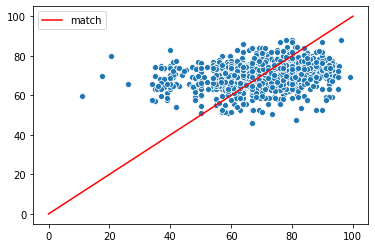

In [11]:
import seaborn as sns
pred = regr2.predict(cx_test)
print(pred)
sns.scatterplot(x=np.ravel(cy_test), y=pred)
sns.lineplot([0,100], [0,100], hue=['match','match'], palette=['r'])